In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
import math
from scipy.stats import spearmanr

from baseline import MultiMethod

import torch
import torch.nn as nn
from ur import Ur

In [3]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
data_path_ur = '/home/panding/code/UR/piv-data/raft-test'
data_path_truth = '/home/panding/code/UR/piv-data/truth'

datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, '*.npy'))
datas_ur = glob.glob(os.path.join(data_path_ur, '*.npy'))
datas_truth = glob.glob(os.path.join(data_path_truth, '*.npy'))

datas_multimodel = sorted(datas_multimodel)
datas_multitransform = sorted(datas_multitransform)
datas_ur = sorted(datas_ur)
datas_truth = sorted(datas_truth)

randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]
datas_multitransform = [datas_multitransform[i] for i in randomidx]
datas_ur = [datas_ur[i] for i in randomidx]
datas_truth = [datas_truth[i] for i in randomidx]

baseline_1 = MultiMethod(datas_multimodel[0], 0)
print(datas_multimodel[0])
# baseline_1.show()
# sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)
uncertainty_u_mm, uncertainty_v_mm = baseline_1.uncertainty(show=0)

baseline_2 = MultiMethod(datas_multitransform[0], 1)
print(datas_multitransform[0])
# baseline_2.show()
# sigma_u, sigma_v = baseline_2.std(show=1)
# sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)
uncertainty_u_mt, uncertainty_v_mt = baseline_2.uncertainty(show=0)

/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_mhd1024_hd_00775.npy
detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_mhd1024_hd_00775.npy


UNet has loaded
load_state_dict has comple
completed!


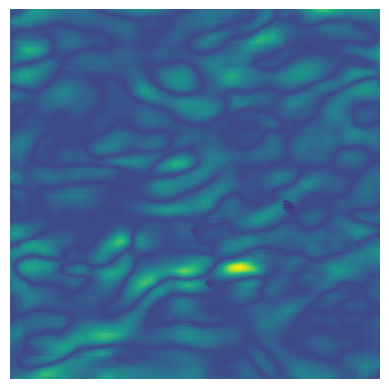

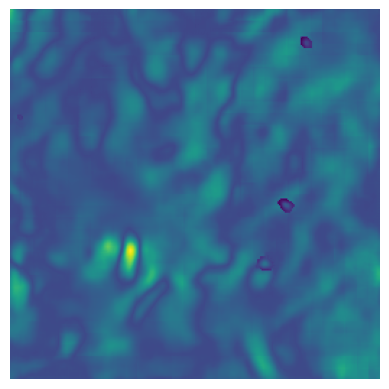

In [11]:
model_path = '/home/panding/code/UR/unet-model/best-1.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load('/home/panding/code/UR/piv-data/raft-test/JHTDB_isotropic1024_hd_01860.npy')
data = data[:4]

uncertainty = Ur('unet', data, path=model_path, device=my_device)
sigma_u_ur_2show, sigma_v_ur_2show = uncertainty.get_sigma2show()
sigma_u_ur, sigma_v_ur = uncertainty.get_sigma()

plt.figure(facecolor='white')
plt.imshow(sigma_u_ur_2show)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/muenn_u.png', bbox_inches='tight',pad_inches = 0)
plt.show()

plt.figure(facecolor='white')
plt.imshow(sigma_v_ur_2show)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('/home/panding/code/UR/fig2/muenn_v.png', bbox_inches='tight',pad_inches = 0)
plt.show()

In [5]:
def show():
    plt.figure(figsize=(12,8))
            
    plt.subplot(2, 3, 1)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 4)
    plt.title('mm_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 2)
    plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 5)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 3)
    plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_u_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 6)
    plt.title('mue_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_v_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.show()
# show()

In [6]:
def show_truth():
    
    truth = np.load(datas_truth[0])
    
    plt.figure(figsize=(12,6))
            
    plt.subplot(2, 5, 1)
    plt.title('flow_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[0])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 6)
    plt.title('flow_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[1])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 2)
    plt.title('flow_u_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[2])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 7)
    plt.title('flow_v_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[3])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 3)
    plt.title('loss_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[4])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 8)
    plt.title('loss_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[5])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 4)
    plt.title('metrics_epe')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[6])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 9)
    plt.title('metrics_1')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[7])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 5)
    plt.title('metrics_3')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[8])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 10)
    plt.title('metrics_5')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[9])
    plt.colorbar(fraction=0.05)

    plt.show()
# show_truth()
def show_general(img1, img2, img3, img4, img5, img6, v_max = 100):
    plt.figure(figsize=(12,5))

    plt.subplot(2, 3, 1)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img1, vmax=v_max)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 4)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2, vmax=v_max)
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 3, 2)
    plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3, vmax=v_max)
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 3, 5)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img4, vmax=v_max)
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 3, 3)
    plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img5, vmax=v_max)
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 3, 6)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img6, vmax=v_max)
    plt.colorbar(fraction=0.05)
    
    plt.show()

In [7]:
def MSE(arr_1, arr_2):
    mse = np.mean( (arr_1 - arr_2) ** 2 )
    return mse

# PSNR越大，代表着图像质量越好
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# SSIM取值范围为[0,1]，值越大表示输出图像和无失真图像的差距越小，即图像质量越好。
def SSIM(y_true , y_pred):
    u_true = np.mean(y_true)
    u_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    std_true = np.sqrt(var_true)
    std_pred = np.sqrt(var_pred)
    R = 255
    c1 = np.square(0.01*R)
    c2 = np.square(0.03*R)
    ssim = (2 * u_true * u_pred + c1) * (2 * std_pred * std_true + c2)
    denom = (u_true ** 2 + u_pred ** 2 + c1) * (var_pred + var_true + c2)
    return ssim / denom

def probability(sigma, loss):
    return np.abs(1 / (sigma * np.sqrt(2 * math.pi))) * np.exp(-np.square(loss) / (2 * np.square(sigma)))

u: mse指标
mm: 0.028025289997458458, mt: 0.035691037774086, mue: 0.05851392447948456
v: mse指标
mm: 0.025117065757513046, mt: 0.024028073996305466, mue: 0.016306495293974876

u: psnr指标
mm: 63.655302456260785, mt: 62.60521184921033, mue: 60.45821134016335
v: psnr指标
mm: 64.13111458276987, mt: 64.3236140014721, mue: 66.00719731406

u: ssim指标
mm: 0.9997664567606134, mt: 0.9999375279156834, mue: 0.995462844151859
v: ssim指标
mm: 0.9988562052318947, mt: 0.9991865302563473, mue: 0.9991857511066553



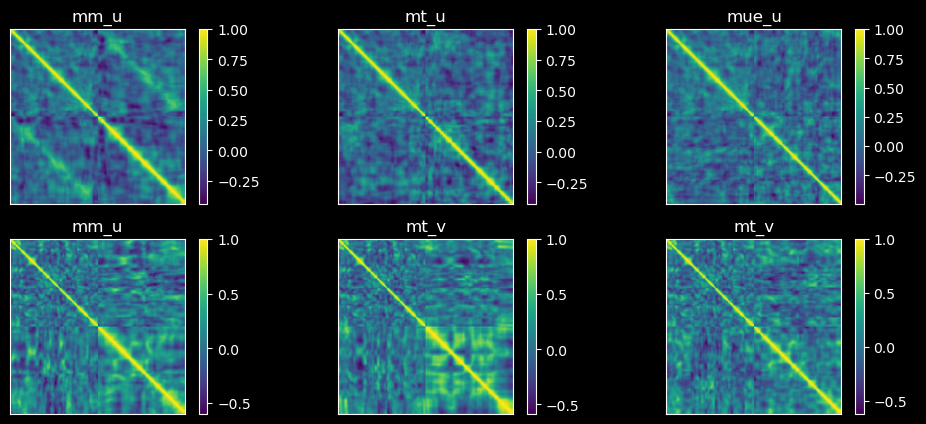

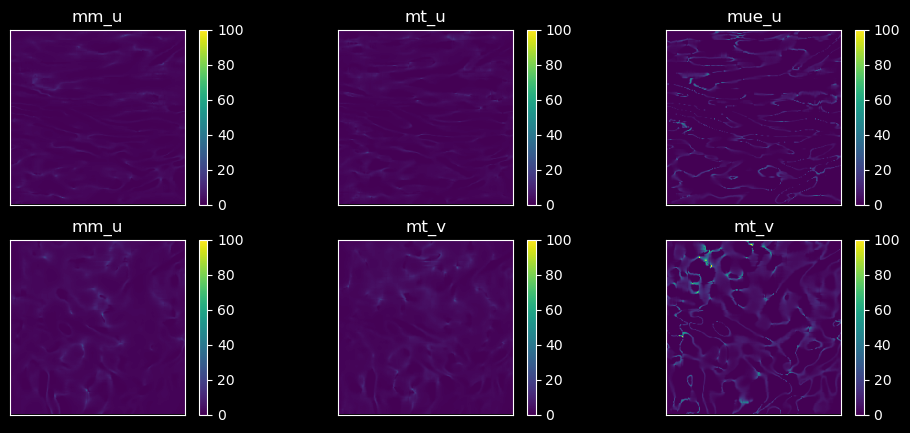

pro_mm_u: 1.3803379535675049, pro_mm_v: 1.938216209411621, pro_mt_u: 1.3236327171325684, pro_mt_v: 2.0375514030456543, pro_mue_u: 1.5586813688278198, pro_mue_v: 3.0883572101593018


In [8]:

truth = np.load(datas_truth[0])
loss_u = truth[4]
loss_v = truth[5]
def print_res():
    mse_mm = MSE(loss_u, uncertainty_u_mm)
    mse_mt = MSE(loss_u, uncertainty_u_mt)
    mse_mue = MSE(loss_u, sigma_u_ur)
    print(f"u: mse指标\nmm: {mse_mm}, mt: {mse_mt}, mue: {mse_mue}")
    mse_mm = MSE(loss_v, uncertainty_v_mm)
    mse_mt = MSE(loss_v, uncertainty_v_mt)
    mse_mue = MSE(loss_v, sigma_v_ur)
    print(f"v: mse指标\nmm: {mse_mm}, mt: {mse_mt}, mue: {mse_mue}\n")

    psnr_mm = PSNR(loss_u, uncertainty_u_mm)
    psnr_mt = PSNR(loss_u, uncertainty_u_mt)
    psnr_mue = PSNR(loss_u, sigma_u_ur)
    print(f"u: psnr指标\nmm: {psnr_mm}, mt: {psnr_mt}, mue: {psnr_mue}")
    psnr_mm = PSNR(loss_v, uncertainty_v_mm)
    psnr_mt = PSNR(loss_v, uncertainty_v_mt)
    psnr_mue = PSNR(loss_v, sigma_v_ur)
    print(f"v: psnr指标\nmm: {psnr_mm}, mt: {psnr_mt}, mue: {psnr_mue}\n")

    ssim_mm = SSIM(loss_u, uncertainty_u_mm)
    ssim_mt = SSIM(loss_u, uncertainty_u_mt)
    ssim_mue = SSIM(loss_u, sigma_u_ur)
    print(f"u: ssim指标\nmm: {ssim_mm}, mt: {ssim_mt}, mue: {ssim_mue}")
    ssim_mm = SSIM(loss_v, uncertainty_v_mm)
    ssim_mt = SSIM(loss_v, uncertainty_v_mt)
    ssim_mue = SSIM(loss_v, sigma_v_ur)
    print(f"v: ssim指标\nmm: {ssim_mm}, mt: {ssim_mt}, mue: {ssim_mue}\n")

    pearson_mm_u, _ = spearmanr(loss_u, uncertainty_u_mm)
    pearson_mt_u, _ = spearmanr(loss_u, uncertainty_u_mt)
    pearson_mue_u, _ = spearmanr(loss_u, sigma_u_ur)
    # print(f"u: pearson指标\nmm: {pearson_mm_u}, mt: {pearson_mt_u}, mue: {pearson_mue_u}")
    pearson_mm_v = np.corrcoef(loss_v, uncertainty_v_mm)
    pearson_mt_v = np.corrcoef(loss_v, uncertainty_v_mt)
    pearson_mue_v = np.corrcoef(loss_v, sigma_v_ur)
    # print(f"v: pearson指标\nmm: {pearson_mm_v}, mt: {pearson_mt_v}, mue: {pearson_mue_v}\n")
    show_general(pearson_mm_u, pearson_mm_v, pearson_mt_u, pearson_mt_v, pearson_mue_u, pearson_mue_v, v_max=1)
    
pro_mm_u = probability(uncertainty_u_mm, loss_u)
pro_mm_v = probability(uncertainty_v_mm, loss_v)
pro_mt_u = probability(uncertainty_u_mt, loss_u)
pro_mt_v = probability(uncertainty_v_mt, loss_v)
pro_mue_u = probability(sigma_u_ur, loss_u)
pro_mue_v = probability(sigma_v_ur, loss_v)

print_res()

show_general(pro_mm_u, pro_mm_v, pro_mt_u, pro_mt_v, pro_mue_u, pro_mue_v, v_max=100)
print(f"pro_mm_u: {pro_mm_u.mean()}, pro_mm_v: {pro_mm_v.mean()}, pro_mt_u: {pro_mt_u.mean()}, pro_mt_v: {pro_mt_v.mean()}, pro_mue_u: {pro_mue_u.mean()}, pro_mue_v: {pro_mue_v.mean()}")

```
/home/panding/code/UR/piv-data/baseline-multitransform/cylinder_Re300_00479.npy
```

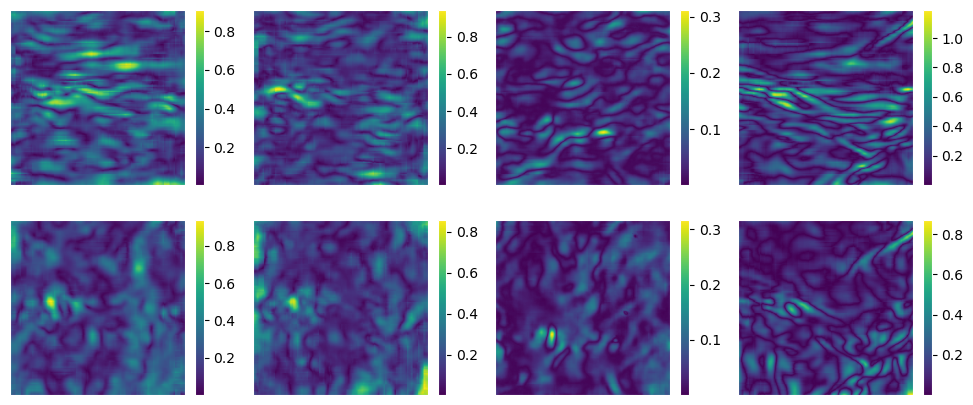

In [9]:
def show2compare():
    truth = np.load(datas_truth[0])

    plt.figure(figsize=(12,5),facecolor='white')

    plt.subplot(2, 4, 1)
    # plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mm)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')


    plt.subplot(2, 4, 5)
    # plt.title('mm_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mm)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 2)
    # plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mt)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 6)
    # plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mt)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 3)
    # plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_u_ur_2show))
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 7)
    # plt.title('mue_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_v_ur_2show))
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 4)
    # plt.title('u_loss')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[4])
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.subplot(2, 4, 8)
    # plt.title('v_loss')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[5])
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')

    plt.show()
show2compare()